How does trip demand vary by time of day, day of the week, and season (e.g., monthly, quarterly)?
Objective:

Analyze how taxi demand (passenger count or trip distance) changes over different times of the day, weekdays versus weekends, and across seasons.
Use time series decomposition to separate trend, seasonality, and residuals to identify patterns in demand.
Potential Analysis:

Visualize demand using heatmaps and line charts by hour of the day and day of the week.
Forecast future demand based on seasonal trends.
Goal:

Predict taxi demand during peak times (e.g., rush hour) and predict which months experience the highest or lowest demand.
2. Can we forecast taxi fare revenue for 2024 based on historical data from 2023?
Objective:

Predict the total fare amount (or total_amount) per day/month for 2024 using historical data.
Explore trends, seasonality, and anomalies in the data to build a robust forecasting model.
Potential Analysis:

Build a Prophet or ARIMA model to predict future revenue patterns.
Compare the forecasted results with actual 2024 data (once available) for validation.
Goal:

Evaluate how accurately the model predicts taxi fare revenues in 2024 and identify revenue peaks or dips.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [6]:
df1 = pd.read_parquet('../data/raw/yellow_tripdata_2024-01.parquet')
df2 = pd.read_parquet('../data/raw/yellow_tripdata_2024-02.parquet')
df3 = pd.read_parquet('../data/raw/yellow_tripdata_2024-03.parquet')
df4 = pd.read_parquet('../data/raw/yellow_tripdata_2024-04.parquet')
df5 = pd.read_parquet('../data/raw/yellow_tripdata_2024-05.parquet')
df6 = pd.read_parquet('../data/raw/yellow_tripdata_2024-06.parquet')

In [7]:
df = pd.concat([df1, df2, df3, df4, df5, df6])

In [8]:
df.shape

(20332093, 19)

In [9]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,2.033209e+07,20332093,20332093,1.835611e+07,2.033209e+07,1.835611e+07,2.033209e+07,2.033209e+07,2.033209e+07,2.033209e+07,2.033209e+07,2.033209e+07,2.033209e+07,2.033209e+07,2.033209e+07,2.033209e+07,1.835611e+07,1.835611e+07
mean,1.758162e+00,2024-04-04 15:46:48.415694,2024-04-04 16:03:41.511144,1.332897e+00,4.704865e+00,2.226112e+00,1.647972e+02,1.638971e+02,1.102157e+00,1.888715e+01,1.408668e+00,4.824373e-01,3.270078e+00,5.468174e-01,9.707874e-01,2.743595e+01,2.249696e+00,1.434393e-01
min,1.000000e+00,2002-12-31 16:46:07,2002-12-31 17:24:07,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.285400e+03,-7.500000e+00,-5.000000e-01,-3.000000e+02,-1.172600e+02,-1.000000e+00,-1.315970e+03,-2.500000e+00,-1.750000e+00
25%,2.000000e+00,2024-02-21 21:43:17,2024-02-21 21:56:08,1.000000e+00,1.020000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.564000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2024-04-05 20:57:06,2024-04-05 21:11:56,1.000000e+00,1.750000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.600000e+00,0.000000e+00,1.000000e+00,2.064000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2024-05-18 02:57:44,2024-05-18 03:10:54,1.000000e+00,3.300000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.160000e+00,0.000000e+00,1.000000e+00,2.985000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2026-06-26 23:53:12,2026-06-27 20:59:10,9.000000e+00,3.127223e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,3.340763e+05,6.599000e+01,3.584000e+01,9.999900e+02,1.702880e+03,1.000000e+00,3.341453e+05,2.520000e+00,1.750000e+00
std,4.296279e-01,NaN,NaN,8.304837e-01,3.592496e+02,1.053827e+01,6.434706e+01,6.954032e+01,6.315719e-01,7.728530e+01,1.819553e+00,1.213081e-01,4.008415e+00,2.214600e+00,2.315571e-01,7.855135e+01,8.404556e-01,4.933100e-01


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20332093 entries, 0 to 3539192
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            flo

In [6]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [104]:
missing_values = df.isnull().sum()
missing_values

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count          1975985
trip_distance                  0
RatecodeID               1975985
store_and_fwd_flag       1975985
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge     1975985
Airport_fee              1975985
dtype: int64

In [9]:
unique_values = df['RatecodeID'].unique()
unique_values

array([ 1.,  5.,  2.,  4., 99.,  3.,  6., nan])

In [12]:
unique_values = df['RatecodeID'].value_counts()
unique_values

RatecodeID
1.0     17232719
2.0       671393
99.0      214773
5.0       134769
3.0        58998
4.0        43423
6.0           33
Name: count, dtype: int64

In [12]:
# Filter rows where 'passenger_count' is null
null_passenger_count = df[df['passenger_count'].isnull()]

# View the result
null_passenger_count


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
2824462,2,2024-01-01 00:34:19,2024-01-01 00:51:22,NaN,2.04,NaN,None,143,141,0,12.72,0.0,0.5,0.00,0.0,1.0,16.72,NaN,NaN
2824463,1,2024-01-01 00:14:31,2024-01-01 00:19:29,NaN,1.60,NaN,None,236,238,0,9.30,1.0,0.5,2.86,0.0,1.0,17.16,NaN,NaN
2824464,1,2024-01-01 00:35:11,2024-01-01 01:13:40,NaN,0.00,NaN,None,142,79,0,21.01,0.0,0.5,0.00,0.0,1.0,25.01,NaN,NaN
2824465,1,2024-01-01 00:33:37,2024-01-01 00:50:34,NaN,0.00,NaN,None,237,4,0,17.79,0.0,0.5,0.00,0.0,1.0,21.79,NaN,NaN
2824466,1,2024-01-01 00:49:04,2024-01-01 01:01:16,NaN,0.00,NaN,None,244,50,0,34.65,0.0,0.5,0.00,0.0,1.0,38.65,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3539188,2,2024-06-30 23:07:36,2024-06-30 23:18:35,NaN,2.51,NaN,None,255,148,0,21.09,0.0,0.5,0.00,0.0,1.0,25.09,NaN,NaN
3539189,2,2024-06-30 23:46:07,2024-07-01 00:11:53,NaN,7.55,NaN,None,68,74,0,33.96,0.0,0.5,0.00,0.0,1.0,37.96,NaN,NaN
3539190,2,2024-06-30 23:18:50,2024-06-30 23:35:09,NaN,4.25,NaN,None,41,100,0,21.01,0.0,0.5,0.00,0.0,1.0,25.01,NaN,NaN
3539191,1,2024-06-30 23:33:36,2024-06-30 23:42:37,NaN,1.60,NaN,None,158,231,0,14.41,0.0,0.5,0.00,0.0,1.0,18.41,NaN,NaN


In [16]:
data=df.copy()

In [ ]:
# Extract hour, day of the week, month, and season from pickup datetime
data['hour'] = data['tpep_pickup_datetime'].dt.hour
data['day_of_week'] = data['tpep_pickup_datetime'].dt.dayofweek  # 0=Monday, 6=Sunday
data['month'] = data['tpep_pickup_datetime'].dt.month

In [19]:
data.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
hour                              int32
day_of_week                       int32
month                             int32
dtype: object

In [20]:
# Convert pickup and dropoff datetime to pandas datetime objects
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

# Verify types
print(data.dtypes)


VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
hour                              int32
day_of_week                       int32
month                             int32
dtype: object


In [25]:
data.head(100000)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,hour,day_of_week,month
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,...,0.5,0.00,0.0,1.0,22.70,2.5,0.0,0,0,1
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,...,0.5,3.75,0.0,1.0,18.75,2.5,0.0,0,0,1
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,...,0.5,3.00,0.0,1.0,31.30,2.5,0.0,0,0,1
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,...,0.5,2.00,0.0,1.0,17.00,2.5,0.0,0,0,1
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,...,0.5,3.20,0.0,1.0,16.10,2.5,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2024-01-02 13:34:18,2024-01-02 13:38:13,1.0,0.70,1.0,N,263,75,1,...,0.5,2.00,0.0,1.0,11.80,2.5,0.0,13,1,1
99996,1,2024-01-02 13:47:42,2024-01-02 13:59:26,1.0,1.70,1.0,N,236,238,1,...,0.5,4.60,0.0,1.0,20.00,2.5,0.0,13,1,1
99997,2,2024-01-02 13:23:51,2024-01-02 13:36:29,1.0,1.87,1.0,N,236,162,1,...,0.5,3.36,0.0,1.0,20.16,2.5,0.0,13,1,1
99998,2,2024-01-02 13:42:04,2024-01-02 13:48:39,1.0,1.58,1.0,N,229,263,2,...,0.5,0.00,0.0,1.0,13.30,2.5,0.0,13,1,1


In [27]:
# Aggregate trip counts per day
daily_demand = data.groupby(data['tpep_pickup_datetime'].dt.date).size().reset_index(name='trip_count')
print(daily_demand.head(1000))


    tpep_pickup_datetime  trip_count
0             2002-12-31          10
1             2008-12-31           5
2             2009-01-01           9
3             2023-12-31          10
4             2024-01-01       81013
..                   ...         ...
183           2024-06-28      111990
184           2024-06-29      109627
185           2024-06-30       91530
186           2024-07-01           3
187           2026-06-26           2

[188 rows x 2 columns]


In [28]:
# Add a weekday/weekend column
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

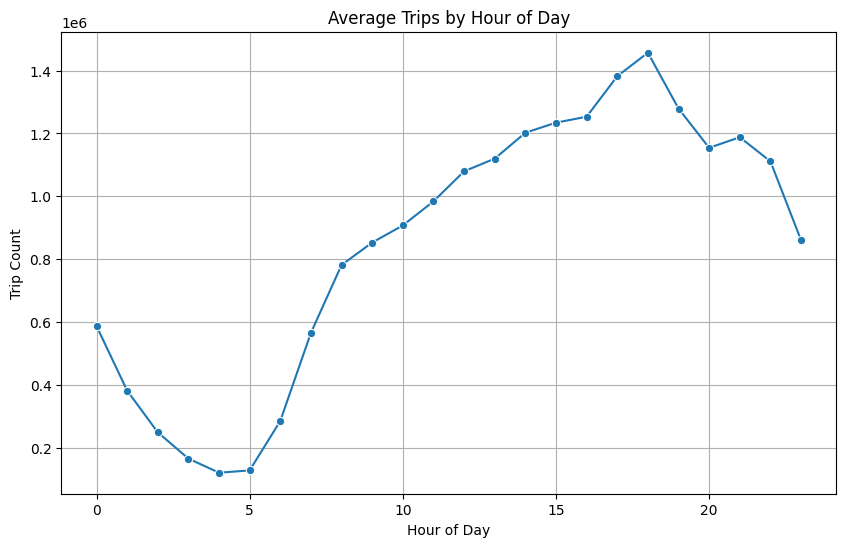

In [29]:
# Aggregate trips by hour
hourly_demand = data.groupby('hour').size().reset_index(name='trip_count')

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='trip_count', data=hourly_demand, marker='o')
plt.title('Average Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Trip Count')
plt.grid()
plt.show()


C:\Users\ujjwa\AppData\Local\Temp\ipykernel_33688\2435575219.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='trip_count', data=weekday_demand, palette='viridis')


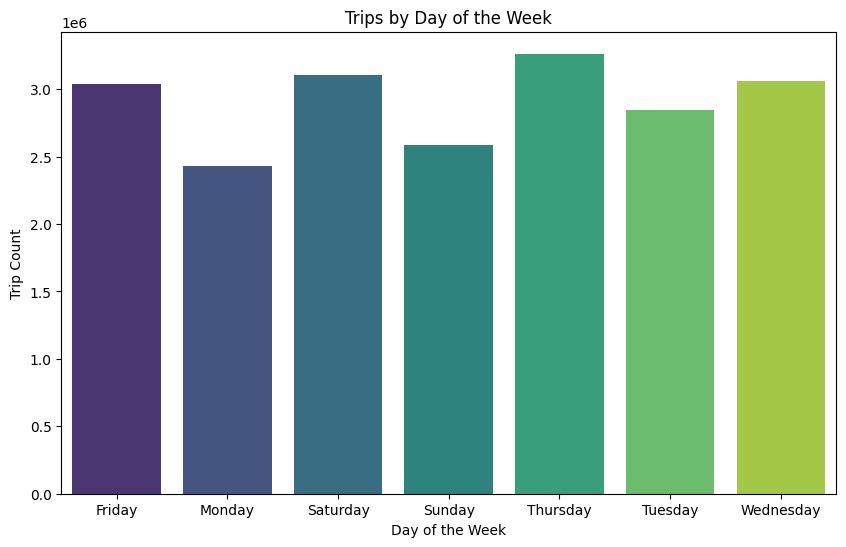

In [30]:
# Aggregate trips by day of the week
weekday_demand = data.groupby('day_of_week').size().reset_index(name='trip_count')

# Map weekday numbers to names
weekday_demand['day_of_week'] = weekday_demand['day_of_week'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

# Sort by weekday
weekday_demand = weekday_demand.sort_values('day_of_week')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='trip_count', data=weekday_demand, palette='viridis')
plt.title('Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Trip Count')
plt.show()


C:\Users\ujjwa\AppData\Local\Temp\ipykernel_33688\388513664.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='trip_count', data=monthly_demand, palette='coolwarm')


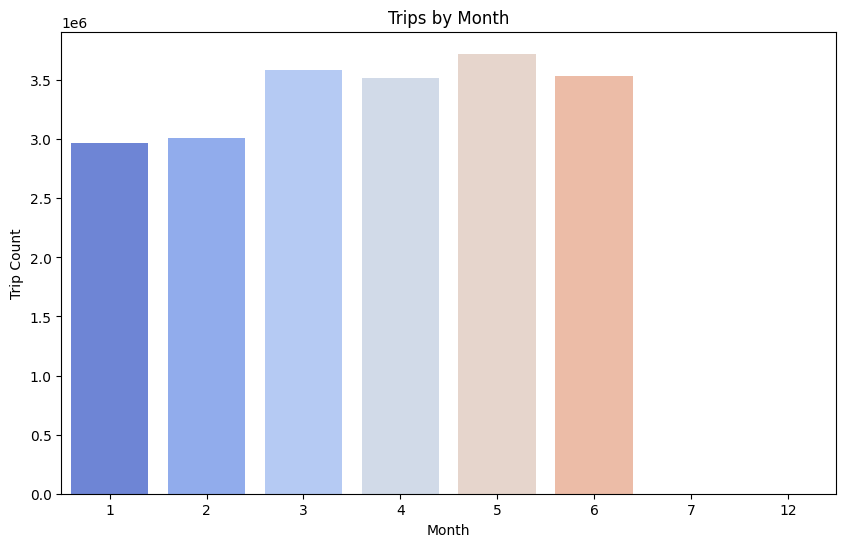

In [31]:
# Aggregate trips by month
monthly_demand = data.groupby('month').size().reset_index(name='trip_count')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='trip_count', data=monthly_demand, palette='coolwarm')
plt.title('Trips by Month')
plt.xlabel('Month')
plt.ylabel('Trip Count')
plt.show()


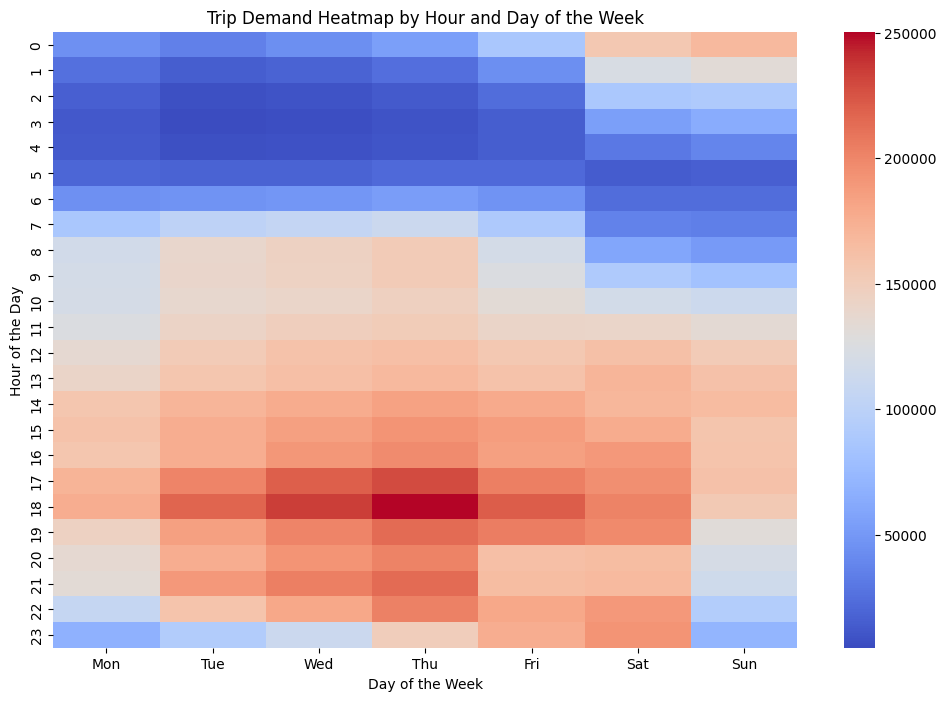

In [32]:
# Aggregate data by hour and day of the week
heatmap_data = data.groupby(['hour', 'day_of_week']).size().unstack()

# Rename day_of_week columns
heatmap_data.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, fmt='.0f', cbar=True)
plt.title('Trip Demand Heatmap by Hour and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()


In [38]:
data = data[
    (data['tpep_pickup_datetime'] >= '2024-01-01') & 
    (data['tpep_pickup_datetime'] <= '2024-06-30')
]

C:\Users\ujjwa\AppData\Local\Temp\ipykernel_33688\2947398096.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = data['tpep_pickup_datetime'].dt.date


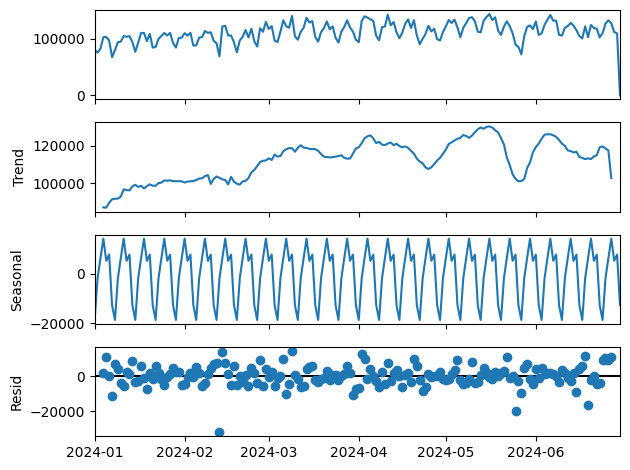

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert pickup_datetime to datetime and set as index
data['date'] = data['tpep_pickup_datetime'].dt.date
daily_demand = data.groupby('date').size()

# Decompose the time series
decomposition = seasonal_decompose(daily_demand, model='additive', period=7)

# Plot decomposed components
decomposition.plot()
plt.show()


In [40]:
df1 = pd.read_parquet('../data/raw/2023/yellow_tripdata_2023-01.parquet')
df2 = pd.read_parquet('../data/raw/2023/yellow_tripdata_2023-02.parquet')
df3 = pd.read_parquet('../data/raw/2023/yellow_tripdata_2023-03.parquet')
df4 = pd.read_parquet('../data/raw/2023/yellow_tripdata_2023-04.parquet')
df5 = pd.read_parquet('../data/raw/2023/yellow_tripdata_2023-05.parquet')
df6 = pd.read_parquet('../data/raw/2023/yellow_tripdata_2023-06.parquet')
df7 = pd.read_parquet('../data/raw/2023/yellow_tripdata_2023-07.parquet')
df8 = pd.read_parquet('../data/raw/2023/yellow_tripdata_2023-08.parquet')
df9 = pd.read_parquet('../data/raw/2023/yellow_tripdata_2023-09.parquet')
df10 = pd.read_parquet('../data/raw/2023/yellow_tripdata_2023-10.parquet')
df11 = pd.read_parquet('../data/raw/2023/yellow_tripdata_2023-11.parquet')
df12 = pd.read_parquet('../data/raw/2023/yellow_tripdata_2023-12.parquet')

df2023 = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])

In [41]:
df2023.shape

(38310226, 20)

In [44]:
df2023 = df2023[
    (df2023['tpep_pickup_datetime'] >= '2023-01-01') & 
    (df2023['tpep_pickup_datetime'] <= '2023-12-31')
]

In [45]:
# Step 1: Convert the pickup datetime to date if you want daily aggregation
df2023['date'] = pd.to_datetime(df2023['tpep_pickup_datetime']).dt.date

# Step 2: Aggregate the data by date (daily taxi demand)
df_daily = df2023.groupby('date').size().reset_index(name='pickups')

# Step 3: Rename the columns for Prophet
df_daily = df_daily.rename(columns={'date': 'ds', 'pickups': 'y'})

# Check the resulting DataFrame
print(df_daily.head())


           ds       y
0  2023-01-01   76752
1  2023-01-02   65777
2  2023-01-03   85783
3  2023-01-04   95092
4  2023-01-05  101063


In [52]:
df_daily.head()

,ds,y
0,2023-01-01,76752
1,2023-01-02,65777
2,2023-01-03,85783
3,2023-01-04,95092
4,2023-01-05,101063


In [56]:
df_daily['ds']=pd.to_datetime(df_daily['ds'])

In [57]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      365 non-null    datetime64[ns]
 1   y       365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [112]:
# Step 1: Initialize the Prophet model
model = Prophet()

# Step 2: Train the model using the daily taxi demand data
model.fit(df_daily)

# Step 3: Create a dataframe for future predictions (let's forecast for the next 365 days, or as per your requirement)
future1 = model.make_future_dataframe(periods=365)  # Adjust 'periods' if you want more/less prediction time

# Step 4: Predict the future taxi demand
forecast = model.predict(future1)

# Step 5: Inspect the forecast dataframe (contains the predictions and other useful information)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

20:11:53 - cmdstanpy - INFO - Chain [1] start processing
20:11:53 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
725,2024-12-26,127530.467712,106727.426087,148817.518516
726,2024-12-27,121788.638791,100473.300130,142765.691010
727,2024-12-28,119511.377969,96968.253192,140924.796793
728,2024-12-29,102127.394698,78767.960662,123290.579438
729,2024-12-30,104048.327034,82049.967369,125395.317558


In [113]:
df_daily = df_daily.reset_index(drop=True)


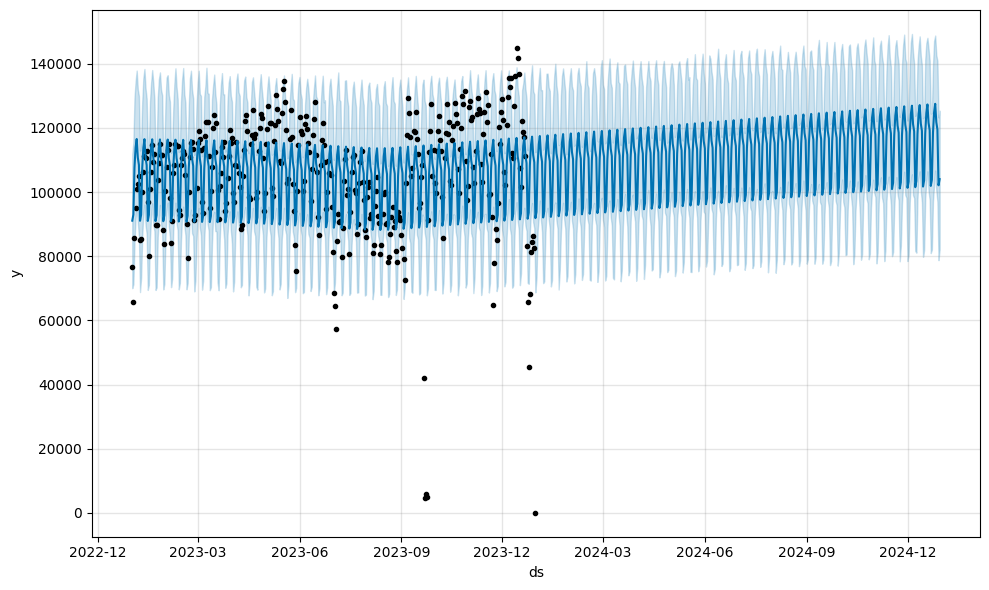

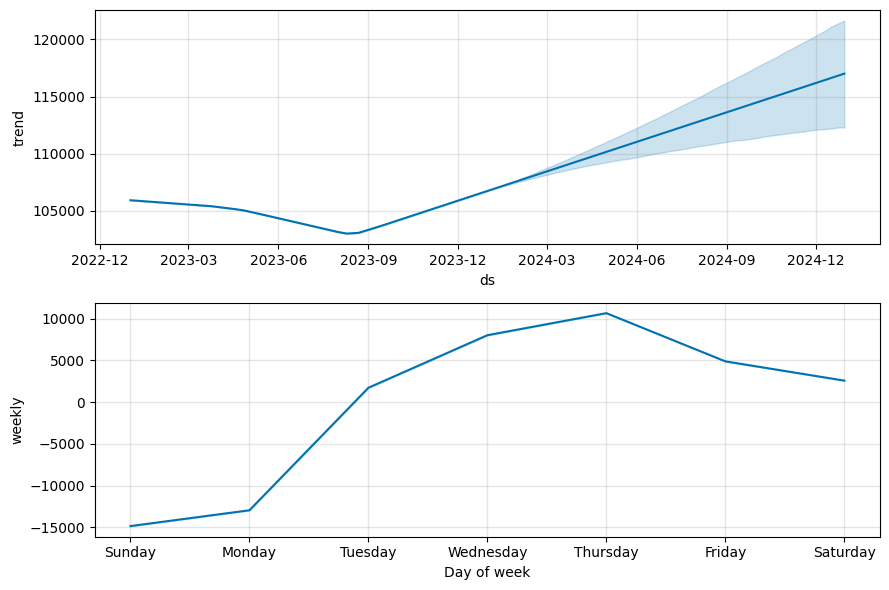

In [114]:
import matplotlib.pyplot as plt

# Step 1: Plot the historical data and forecasted values
fig = model.plot(forecast)

# Step 2: Optionally, plot the forecast components (e.g., trend, seasonality)
fig2 = model.plot_components(forecast)

# Display the plots
plt.show()


In [115]:
# Assuming 'tpep_pickup_datetime' is the datetime column and 'fare_amount' is the fare column

# Convert 'tpep_pickup_datetime' to datetime if it's not already
df2023['tpep_pickup_datetime'] = pd.to_datetime(df2023['tpep_pickup_datetime'])

# Aggregate the daily total fare
df2023['date'] = df2023['tpep_pickup_datetime'].dt.date
daily_revenue = df2023.groupby('date')['fare_amount'].sum().reset_index()

# Rename columns for convenience
daily_revenue.columns = ['ds', 'y']


20:15:25 - cmdstanpy - INFO - Chain [1] start processing
20:15:25 - cmdstanpy - INFO - Chain [1] done processing


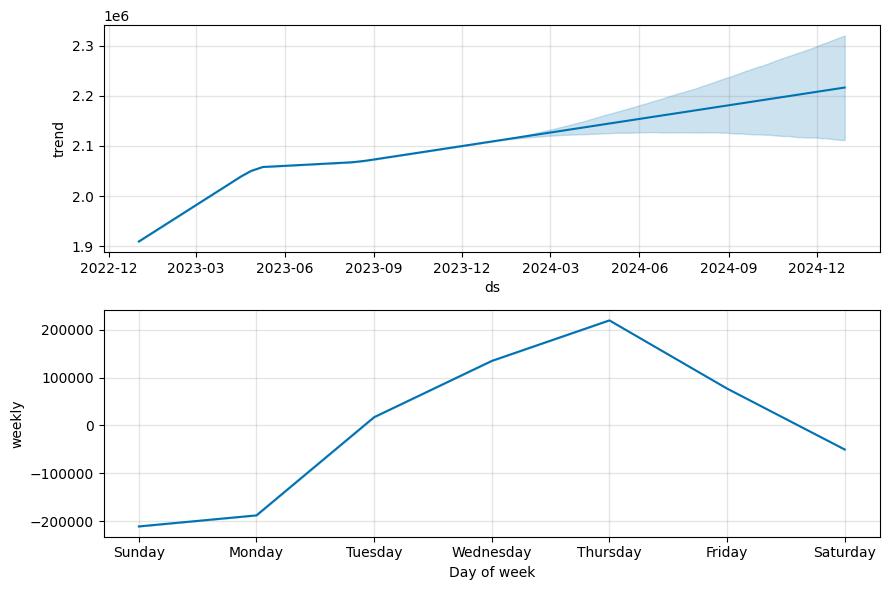

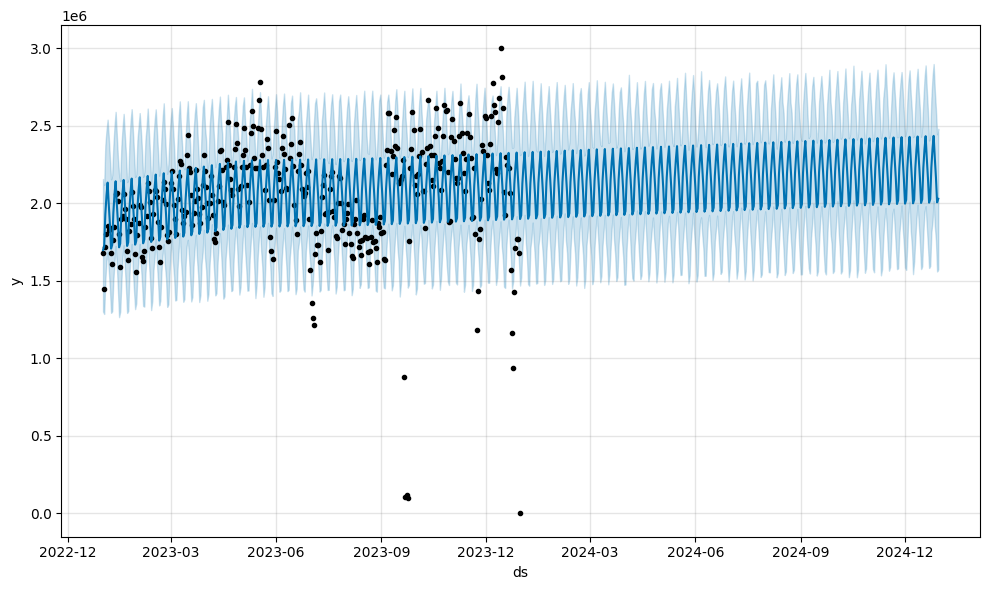

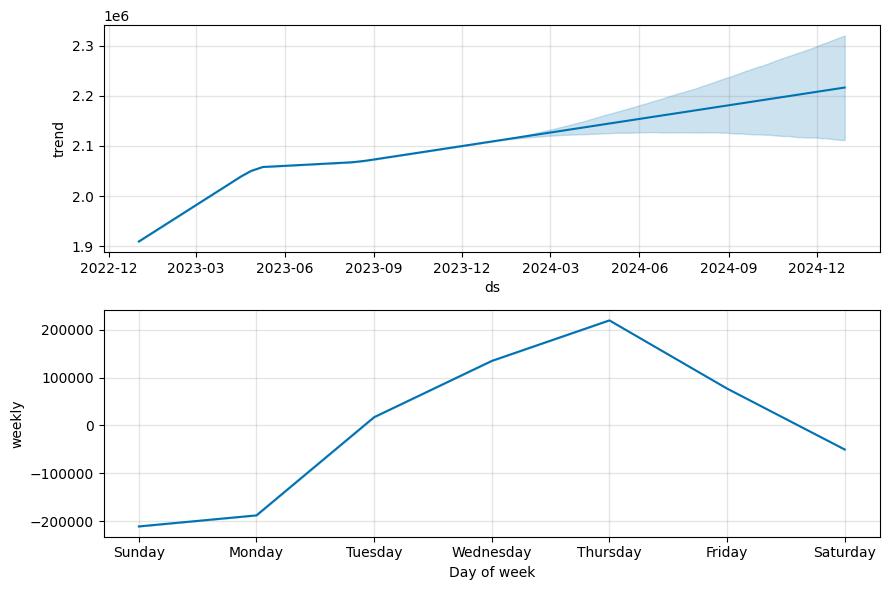

In [126]:
# Initialize the model
revenue_model = Prophet()

# Fit the revenue model on the aggregated data
revenue_model.fit(daily_revenue)

# Make future data frame for prediction (e.g., for 2024)
future_revenue = revenue_model.make_future_dataframe(periods=365)

# Forecast the revenue
forecast_revenue = revenue_model.predict(future_revenue)

# Plot the forecast
revenue_model.plot(forecast_revenue)
revenue_model.plot_components(forecast_revenue)

In [127]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [128]:
df2024=data.copy()

In [129]:
import pandas as pd

# Assuming df2024 is your dataset containing trip details

# Ensure 'tpep_pickup_datetime' is in datetime format
df2024['tpep_pickup_datetime'] = pd.to_datetime(df2024['tpep_pickup_datetime'])

# Extract date from the 'tpep_pickup_datetime' column
df2024['date'] = df2024['tpep_pickup_datetime'].dt.date

# Calculate total revenue for each row
df2024['total_revenue'] = df2024['fare_amount'] 

# Aggregate total revenue by date
df_revenue = df2024.groupby('date').agg({'total_revenue': 'sum'}).reset_index()

# Rename columns for consistency
df_revenue.rename(columns={'date': 'ds', 'total_revenue': 'y_y'}, inplace=True)

# Check the first few rows
df_revenue.head()


,ds,y_y
0,2024-01-01,1765112.95
1,2024-01-02,1583412.42
2,2024-01-03,1620846.39
3,2024-01-04,1895571.58
4,2024-01-05,1839917.01


In [130]:
df_revenue['ds']=pd.to_datetime(df_revenue['ds'])

In [131]:
df_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      182 non-null    datetime64[ns]
 1   y_y     182 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB


In [132]:
forecast_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          730 non-null    datetime64[ns]
 1   trend                       730 non-null    float64       
 2   yhat_lower                  730 non-null    float64       
 3   yhat_upper                  730 non-null    float64       
 4   trend_lower                 730 non-null    float64       
 5   trend_upper                 730 non-null    float64       
 6   additive_terms              730 non-null    float64       
 7   additive_terms_lower        730 non-null    float64       
 8   additive_terms_upper        730 non-null    float64       
 9   weekly                      730 non-null    float64       
 10  weekly_lower                730 non-null    float64       
 11  weekly_upper                730 non-null    float64       

In [133]:
# Assuming 'actual_revenue' is the actual revenue dataframe for the first 6 months of 2024
# actual_revenue has columns: ['ds', 'y'] where 'ds' is date and 'y' is revenue

# Filter forecasted data for the first 6 months of 2024
forecasted_revenue_first_6months = forecast_revenue[forecast_revenue['ds'] <= '2024-06-30']

# Merge forecasted and actual data on 'ds' (date)
comparison_df = pd.merge(forecasted_revenue_first_6months, df_revenue, on='ds', how='inner')

# Calculate prediction error metrics (e.g., RMSE, MAPE)
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# MAE (Mean Absolute Error)
mae = mean_absolute_error(comparison_df['y_y'], comparison_df['yhat'])
# RMSE (Root Mean Squared Error)
rmse = mean_squared_error(comparison_df['y_y'], comparison_df['yhat'], squared=False)
# MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(comparison_df['y_y'], comparison_df['yhat'])

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')


MAE: 239915.87521156637
RMSE: 318727.4249623224
MAPE: 67.884316782303%


d:\CS 6120\Final Project\cs6010_fa2024_project_g06\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


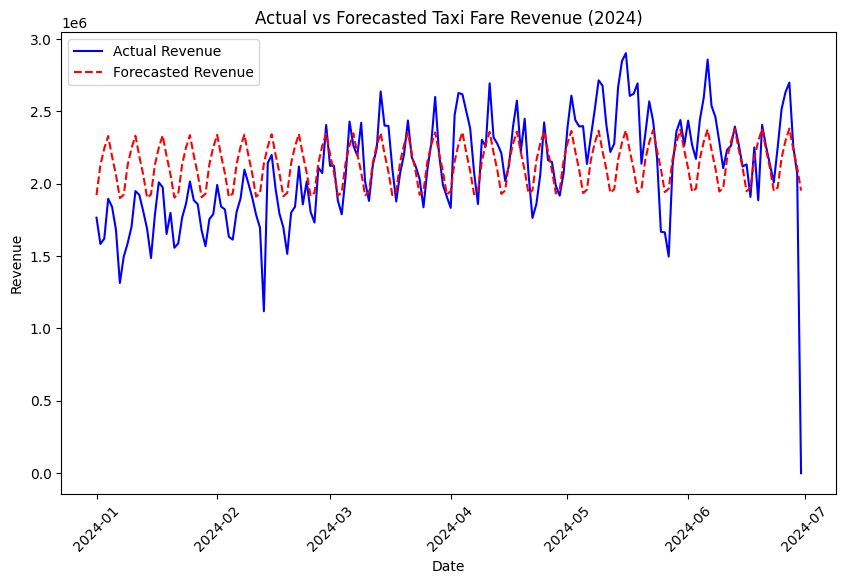

In [134]:
import matplotlib.pyplot as plt

# Plot forecasted vs actual revenue
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['ds'], comparison_df['y_y'], label='Actual Revenue', color='blue')
plt.plot(comparison_df['ds'], comparison_df['yhat'], label='Forecasted Revenue', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Actual vs Forecasted Taxi Fare Revenue (2024)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [135]:
from prophet.diagnostics import cross_validation, performance_metrics

# Perform cross-validation on the trained Prophet model
df_cv = cross_validation(revenue_model, initial='365 days', period='180 days', horizon='180 days')

# Evaluate the performance of the forecast
df_p = performance_metrics(df_cv)
print(df_p.head())


ValueError: Less data than horizon after initial window. Make horizon or initial shorter.

In [138]:
# Import required libraries
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

def prepare_prophet_dataframe(df):
    """
    Prepare dataframe for Prophet by creating 'ds' (date) and 'y' (total amount) columns
    
    Args:
        df (pd.DataFrame): Input dataframe with datetime and total_amount columns
    
    Returns:
        pd.DataFrame: Dataframe aggregated by day with Prophet-compatible columns
    """
    # Ensure pickup_datetime is in datetime format
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    
    # Group by date and sum total amounts
    daily_revenue = df.groupby(df['tpep_pickup_datetime'].dt.date)['total_amount'].sum().reset_index()
    
    # Rename columns to Prophet's required format
    daily_revenue.columns = ['ds', 'y']
    daily_revenue['ds'] = pd.to_datetime(daily_revenue['ds'])
    
    return daily_revenue

def train_prophet_model(train_df, seasonality_mode='multiplicative'):
    """
    Train Prophet model with customized settings
    
    Args:
        train_df (pd.DataFrame): Training dataframe
        seasonality_mode (str): Seasonality mode for Prophet
    
    Returns:
        Prophet model
    """
    model = Prophet(
        seasonality_mode=seasonality_mode,
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        interval_width=0.95
    )
    
    model.fit(train_df)
    return model

def forecast_revenue(model, periods):
    """
    Generate future forecast
    
    Args:
        model (Prophet): Trained Prophet model
        periods (int): Number of periods to forecast
    
    Returns:
        pd.DataFrame: Forecast dataframe
    """
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast

def evaluate_forecast(actual_df, forecast_df):
    """
    Compare forecasted values with actual values
    
    Args:
        actual_df (pd.DataFrame): Actual daily revenue data
        forecast_df (pd.DataFrame): Prophet forecast dataframe
    
    Returns:
        dict: Evaluation metrics
    """
    # Merge actual and forecasted data
    merged_df = pd.merge(
        actual_df, 
        forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], 
        on='ds', 
        how='inner'
    )
    
    # Calculate metrics
    mae = mean_absolute_error(merged_df['y'], merged_df['yhat'])
    mape = mean_absolute_percentage_error(merged_df['y'], merged_df['yhat'])
    
    return {
        'Mean Absolute Error': mae,
        'Mean Absolute Percentage Error': mape * 100,
        'Forecast Accuracy': f"{(1 - mape) * 100:.2f}%"
    }

def plot_forecast(model, forecast):
    """
    Plot forecast results with interactive Jupyter Notebook settings
    
    Args:
        model (Prophet): Trained Prophet model
        forecast (pd.DataFrame): Forecast dataframe
    """
    # Ensure plot is displayed inline in Jupyter
    %matplotlib inline
    
    # Create larger figure for better readability
    plt.figure(figsize=(16, 8))
    
    # Plot forecast
    model.plot(forecast)
    plt.title('NYC Taxi Daily Revenue Forecast', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Total Daily Revenue ($)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def plot_components(model, forecast):
    """
    Plot model components for deeper insights
    
    Args:
        model (Prophet): Trained Prophet model
        forecast (pd.DataFrame): Forecast dataframe
    """
    # Ensure plot is displayed inline in Jupyter
    %matplotlib inline
    
    # Create figure for components
    fig = model.plot_components(forecast)
    plt.tight_layout()
    plt.show()

def taxi_revenue_forecast_workflow(df_2023, df_2024_partial):
    """
    Complete workflow for taxi revenue forecasting
    
    Args:
        df_2023 (pd.DataFrame): Full 2023 dataset
        df_2024_partial (pd.DataFrame): Partial 2024 dataset for validation
    
    Returns:
        dict: Comprehensive forecast results
    """
    # Prepare data for Prophet
    prophet_train_df = prepare_prophet_dataframe(df_2023)
    prophet_actual_df = prepare_prophet_dataframe(df_2024_partial)
    
    # Train model
    model = train_prophet_model(prophet_train_df)
    
    # Forecast future revenues
    forecast = forecast_revenue(model, periods=365)
    
    # Evaluate forecast
    evaluation_metrics = evaluate_forecast(prophet_actual_df, forecast)
    
    # Visualizations
    plot_forecast(model, forecast)
    plot_components(model, forecast)
    
    return {
        'model': model,
        'forecast': forecast,
        'evaluation_metrics': evaluation_metrics
    }

# Usage Instructions:
# 1. Load your 2023 and partial 2024 dataframes
# 2. Ensure they have 'pickup_datetime' and 'total_amount' columns
# 3. Call taxi_revenue_forecast_workflow(df_2023, df_2024_partial)

# Recommended Pre-Analysis Steps:
# - Check and handle missing values
# - Remove extreme outliers
# - Verify datetime and numeric column types

20:25:02 - cmdstanpy - INFO - Chain [1] start processing
20:25:02 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1600x800 with 0 Axes>

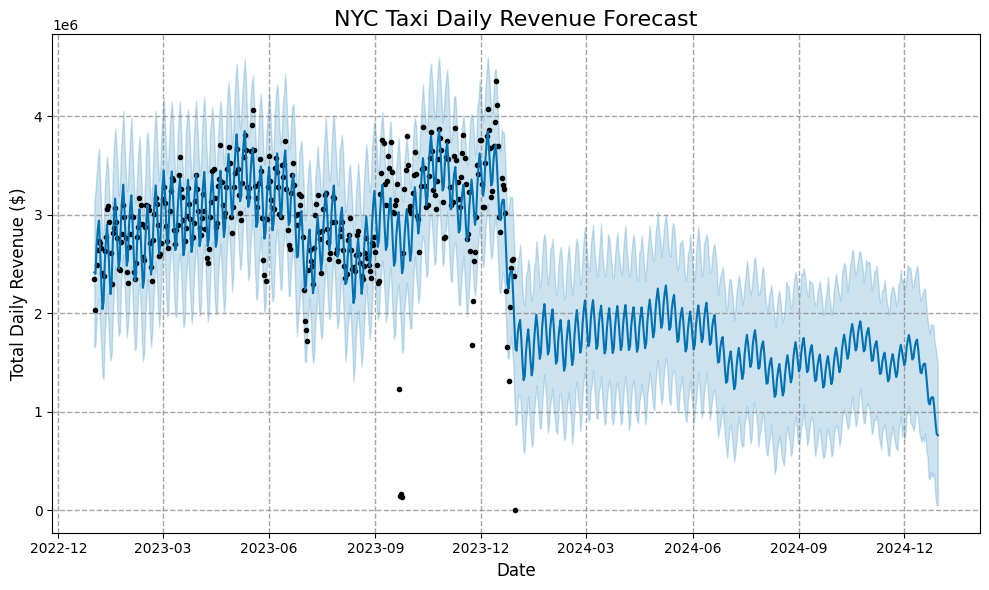

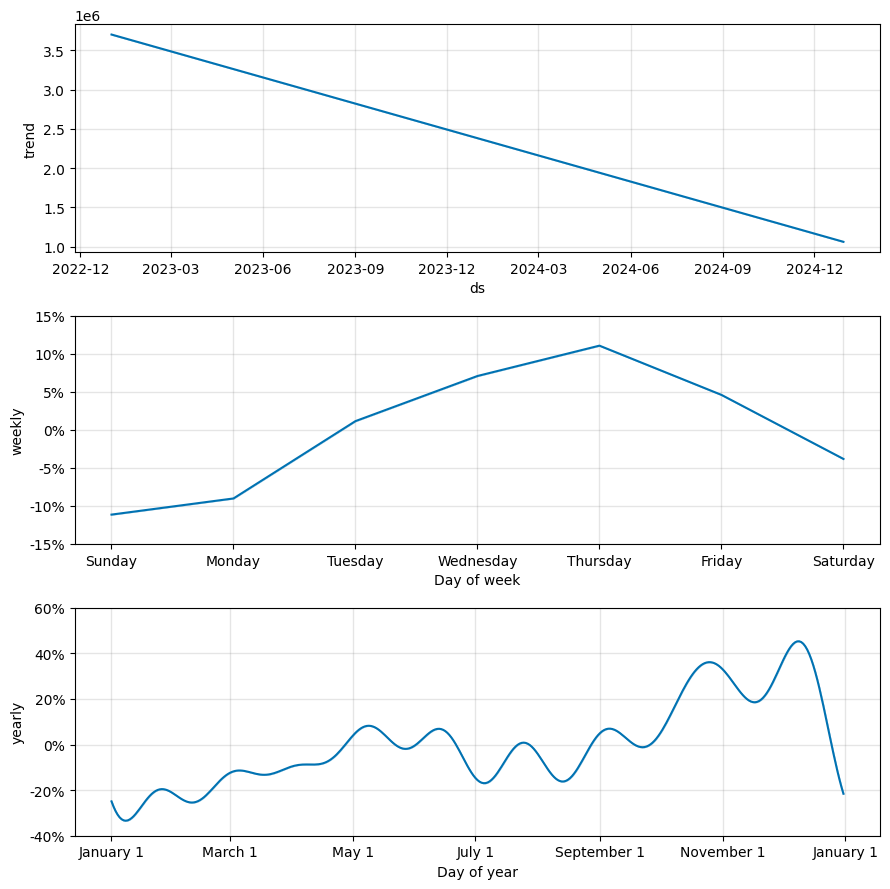

{'model': <prophet.forecaster.Prophet at 0x2eb44eadb90>,
 'forecast':             ds         trend    yhat_lower    yhat_upper   trend_lower  \
 0   2023-01-01  3.700773e+06  1.654532e+06  3.127661e+06  3.700773e+06   
 1   2023-01-02  3.697151e+06  1.682888e+06  3.233897e+06  3.697151e+06   
 2   2023-01-03  3.693529e+06  1.966805e+06  3.411635e+06  3.693529e+06   
 3   2023-01-04  3.689906e+06  2.108765e+06  3.572831e+06  3.689906e+06   
 4   2023-01-05  3.686284e+06  2.143047e+06  3.671379e+06  3.686284e+06   
 ..         ...           ...           ...           ...           ...   
 725 2024-12-26  1.074503e+06  3.734831e+05  1.882747e+06  1.074503e+06   
 726 2024-12-27  1.070881e+06  3.288752e+05  1.728274e+06  1.070880e+06   
 727 2024-12-28  1.067258e+06  1.146613e+05  1.656216e+06  1.067258e+06   
 728 2024-12-29  1.063636e+06  5.444659e+04  1.569534e+06  1.063635e+06   
 729 2024-12-30  1.060013e+06  5.094455e+04  1.469089e+06  1.060013e+06   
 
       trend_upper  multiplic

In [139]:
taxi_revenue_forecast_workflow(df2023, data)